In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./ex1/ex1data2.txt', names=['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
data = (data - data.mean()) / data.std()
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [4]:
data.insert(0, 'ones', 1)
data.head()

,ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [5]:
X = data.iloc[:, :3]
X.head()

,ones,Size,Bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [6]:
y = data.iloc[:, 3:]
y.head()

,Price
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


In [7]:
theta = np.array([[0, 0, 0]])

In [8]:
X.shape, y.shape ,theta.shape

((47, 3), (47, 1), (1, 3))

In [9]:
def Cost(X, y, theta):
    _sum = np.power((np.dot(X, theta.T) - y), 2)
    cost = _sum / 2*len(X)
    return cost

def GradientDescent(X, y, theta, alpha, epoch):
    temp = theta
    m = len(X)
    cost = []
    
    for i in range(epoch):
        temp = theta - (alpha/m)*np.dot((np.dot(X, theta.T) - y).T, X)
        theta = temp
        cost.append(Cost(X, y, theta))
        if i % 100 == 0:
            print('epoch:', i, 'theta:', theta[0])
    return theta, cost

In [10]:
alpha = 0.03
epoch = 1000

In [11]:
theta, cost = GradientDescent(X, y, theta, alpha, epoch)

epoch: 0 theta: [-3.25980377e-18  2.51038910e-02  1.29855392e-02]
epoch: 100 theta: [-1.27415808e-16  7.55011564e-01  6.92753652e-02]
epoch: 200 theta: [-1.11967173e-16  8.50379758e-01 -1.88597522e-02]
epoch: 300 theta: [-1.03109011e-16  8.75407517e-01 -4.38209668e-02]
epoch: 400 theta: [-1.01833435e-16  8.82216685e-01 -5.06295230e-02]
epoch: 500 theta: [-1.01053917e-16  8.84071522e-01 -5.24843534e-02]
epoch: 600 theta: [-1.00628725e-16  8.84576805e-01 -5.29896369e-02]
epoch: 700 theta: [-9.94948804e-17  8.84714452e-01 -5.31272835e-02]
epoch: 800 theta: [-9.87862274e-17  8.84751949e-01 -5.31647805e-02]
epoch: 900 theta: [-1.01266513e-16  8.84762163e-01 -5.31749952e-02]


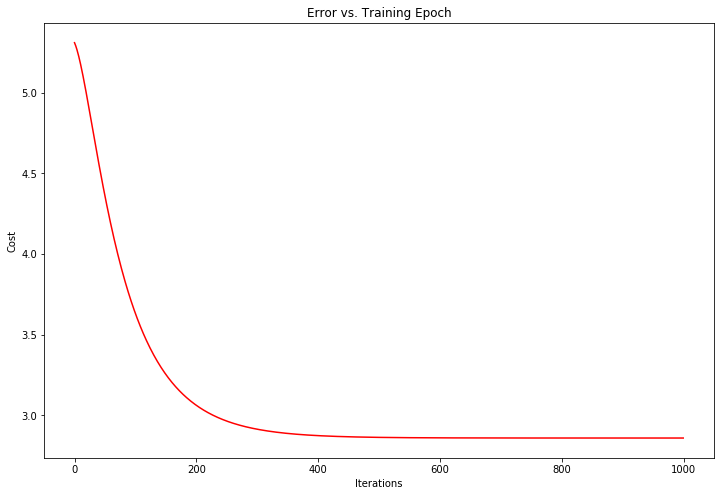

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(epoch), list(map(lambda x: np.array(x).tolist()[0][0], cost)), 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()